In [1]:
from __future__ import print_function
import torch
from models import SketchModule
from utils import load_image, to_data, to_var, visualize, save_image, gaussian, weights_init
# from utils import load_train_batchfnames, prepare_text_batch

from utils import custom_load_train_batchfnames, prepare_text_batch

import time
import argparse
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

opts = argparse.ArgumentParser()
opts.GB_nlayers = 8
opts.DB_nlayers = 5
opts.GB_nf = 128
opts.DB_nf = 64
opts.gpu = True
opts.epochs = 6
opts.save_GB_name = '../save/GB.ckpt'
opts.batchsize = 32
opts.text_path = '../data/rawtext/yaheiB/train'
opts.augment_text_path = '../data/new_augment'
opts.text_datasize = 1760
opts.augment_text_datasize = 22
opts.Btraining_num = 25600


import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
import cv2
import scipy.ndimage as pyimg
import random
import os

In [2]:
file_name_to_test = '/home/abhirag/cv_project/experiment/data/rawtext/yaheiB/train/swift.png'

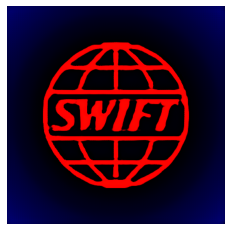

In [3]:
netSketch = SketchModule(8, 5, 128, 64, opts.gpu)
if opts.gpu:
    netSketch.cuda()
netSketch.init_networks(weights_init)
netSketch.train()

# theirs

# netSketch.load_state_dict(torch.load('/home/abhirag/cv_project/experiment/save/GB.ckpt0'))
netSketch.load_state_dict(torch.load('/home/abhirag/cv_project/experiment/save/GB.ckpt3'))

# ours

# netSketch.load_state_dict(torch.load('../save/GB.ckpt'))


netSketch.eval()
I = load_image(file_name_to_test)
I = to_var(I[:,:,:,0:I.size(3)])
result = netSketch(I, -1.)
visualize(to_data(result[0]))

In [4]:
del netSketch